In [21]:
# Compute TopPop


# Filter for high ratings (>= 3)
high_rated = train_df[train_df[rating_col] >= 3]

# Count high ratings per item
top_items = high_rated.groupby(item_col).agg(
    high_rating_count=(rating_col, 'count'),
    avg_rating=(rating_col, 'mean'),
    min_rating=(rating_col, 'min'),
    max_rating=(rating_col, 'max')
).reset_index()

# Sort by count descending
top_items = top_items.sort_values('high_rating_count', ascending=False)

# Get top 5
top_5 = top_items.head(5)

print("\nTOP 5 MOST HIGHLY RATED ITEMS:")
print("-"*50)
print(top_5.to_string(index=False))

# If you want to see more details (top 10)
print("\nTOP 10 MOST HIGHLY RATED ITEMS:")
print("-"*50)
print(top_items.head(10).to_string(index=False))

# Create a nice table format for your report
print("\n" + "-"*50)
print("TABLE FOR REPORT (Top 5 Items)")
print("-"*50)
print("| Item ID | Number of High Ratings (≥3) | Average Rating |")
print("|---------|------------------------------|----------------|")
for _, row in top_5.iterrows():
    print(f"| {row[item_col]} | {row['high_rating_count']} | {row['avg_rating']:.2f} |")

# Save results for future weeks
top_items.to_csv('top_items.csv', index=False)
top_5.to_csv('top_5_items.csv', index=False)
train_df.to_parquet('cleaned_train.parquet', index=False)
test_df.to_parquet('cleaned_test.parquet', index=False)

print("\n" + "="*50)
print("WEEK 6 COMPLETE!")
print("="*50)
print("\nSaved files:")
print("  - top_items.csv (all items with high rating counts)")
print("  - top_5_items.csv (top 5 items)")
print("  - cleaned_train.parquet (cleaned training data)")
print("  - cleaned_test.parquet (cleaned test data)")


TOP 5 MOST HIGHLY RATED ITEMS:
--------------------------------------------------
   item_id  high_rating_count  avg_rating  min_rating  max_rating
B0086VPUHI                154    4.694805         3.0         5.0
B00BN5T30E                150    4.626667         3.0         5.0
B07YBXFDYN                146    4.712329         3.0         5.0
B00BGA9WK2                136    4.720588         3.0         5.0
B007CM0K86                123    4.682927         3.0         5.0

TOP 10 MOST HIGHLY RATED ITEMS:
--------------------------------------------------
   item_id  high_rating_count  avg_rating  min_rating  max_rating
B0086VPUHI                154    4.694805         3.0         5.0
B00BN5T30E                150    4.626667         3.0         5.0
B07YBXFDYN                146    4.712329         3.0         5.0
B00BGA9WK2                136    4.720588         3.0         5.0
B007CM0K86                123    4.682927         3.0         5.0
B00KIWEMIG                109    4.568807


------------------------------
USER STATISTICS (ratings per user)
------------------------------
count    1389.000000
mean       19.136069
std        10.197237
min        12.000000
25%        13.000000
50%        16.000000
75%        21.000000
max       114.000000
dtype: float64

------------------------------
ITEM STATISTICS (ratings per item)
------------------------------
count    932.000000
mean      28.519313
std       21.089514
min        8.000000
25%       15.000000
50%       22.000000
75%       33.000000
max      167.000000
dtype: float64

------------------------------
RATING VALUE DISTRIBUTION
------------------------------
rating
1.0     1479
2.0     1220
3.0     2840
4.0     5251
5.0    15790
Name: count, dtype: int64

Percentage of ratings >= 3: 89.85%


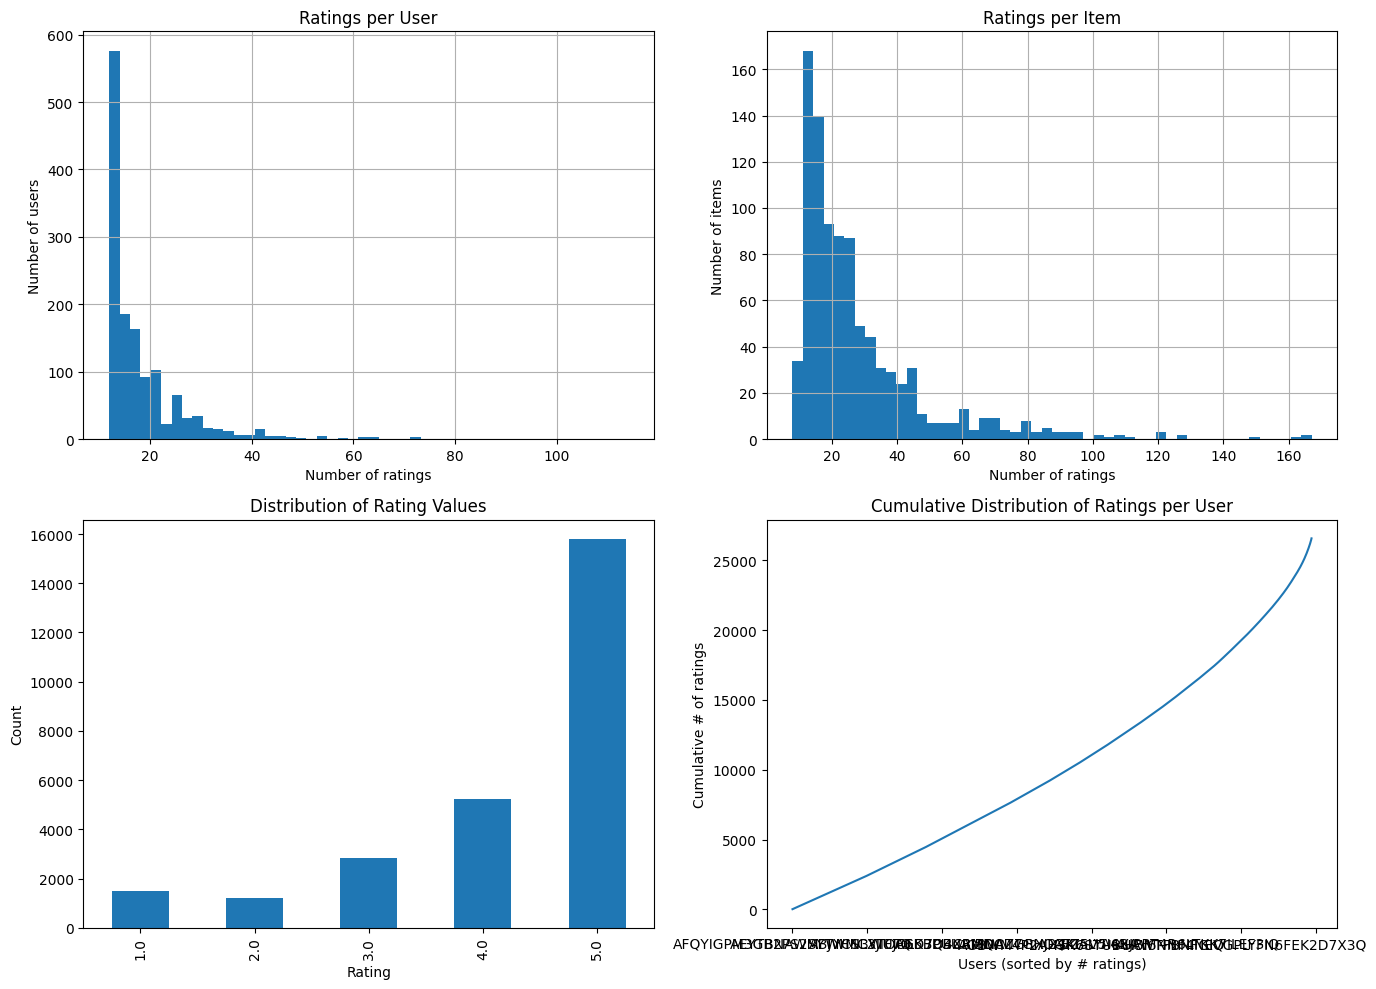


------------------------------
DATASET SPARSITY
------------------------------
Number of users: 1389
Number of items: 932
Number of ratings: 26580
Possible ratings (if dense): 1294548
Sparsity: 0.9795 (97.95% missing ratings)


In [20]:
#Compute user and item statistics

import matplotlib.pyplot as plt

# Defining my actual column names
user_col = 'user_id'
item_col = 'item_id'
rating_col = 'rating'

# Ratings per user
user_rating_counts = train_df.groupby(user_col).size()
print("\n" + "-"*30)
print("USER STATISTICS (ratings per user)")
print("-"*30)
print(user_rating_counts.describe())

# Ratings per item
item_rating_counts = train_df.groupby(item_col).size()
print("\n" + "-"*30)
print("ITEM STATISTICS (ratings per item)")
print("-"*30)
print(item_rating_counts.describe())

# Rating value distribution
print("\n" + "-"*30)
print("RATING VALUE DISTRIBUTION")
print("-"*30)
rating_distribution = train_df[rating_col].value_counts().sort_index()
print(rating_distribution)
print(f"\nPercentage of ratings >= 3: {(train_df[rating_col] >= 3).mean() * 100:.2f}%")

# Visualize distributions
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Ratings per user histogram
user_rating_counts.hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Ratings per User')
axes[0, 0].set_xlabel('Number of ratings')
axes[0, 0].set_ylabel('Number of users')

# Ratings per item histogram
item_rating_counts.hist(bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Ratings per Item')
axes[0, 1].set_xlabel('Number of ratings')
axes[0, 1].set_ylabel('Number of items')

# Rating value distribution
rating_distribution.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Rating Values')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Count')

# Cumulative distribution of ratings per user
user_rating_counts.sort_values().cumsum().plot(ax=axes[1, 1])
axes[1, 1].set_title('Cumulative Distribution of Ratings per User')
axes[1, 1].set_xlabel('Users (sorted by # ratings)')
axes[1, 1].set_ylabel('Cumulative # of ratings')

plt.tight_layout()
plt.show()

# Calculate sparsity
n_users = len(train_df[user_col].unique())
n_items = len(train_df[item_col].unique())
n_ratings = len(train_df)
possible_ratings = n_users * n_items
sparsity = 1 - (n_ratings / possible_ratings)

print("\n" + "-"*30)
print("DATASET SPARSITY")
print("-"*30)
print(f"Number of users: {n_users}")
print(f"Number of items: {n_items}")
print(f"Number of ratings: {n_ratings}")
print(f"Possible ratings (if dense): {possible_ratings}")
print(f"Sparsity: {sparsity:.4f} ({sparsity*100:.2f}% missing ratings)")


In [8]:
# Check overlap between train and test

# Get unique users from each set
train_users = set(train_df[user_col].unique())
test_users = set(test_df[user_col].unique())

print(f"amount of unique users in training set: {len(train_users)}")
print(f"amount unique users in test set: {len(test_users)}")

# Find users in test that aren't in train
users_not_in_train = test_users - train_users
print(f"Users in test but not in train: {len(users_not_in_train)}")

# Remove those users from test set
if len(users_not_in_train) > 0:
    test_df = test_df[~test_df[user_col].isin(users_not_in_train)]
    print(f"Test set size after removal: {len(test_df)}")
    print(f"Unique users in test after removal: {len(test_df[user_col].unique())}")
else:
    print("All test users appear in training set")

amount of unique users in training set: 1389
amount unique users in test set: 1389
Users in test but not in train: 0
All test users appear in training set


In [6]:
#clean dataset

# Defining column names
user_col = 'user_id'
item_col = 'item_id'
rating_col = 'rating'

# Check for missing values
print("\nMissing values in training set:")
print(train_df.isnull().sum())

# Drop rows with missing user_id or item_id
train_df = train_df.dropna(subset=[user_col, item_col])
test_df = test_df.dropna(subset=[user_col, item_col])

print(f"\nAfter dropping missing values:")
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

# Check for duplicates
duplicates = train_df.duplicated(subset=[user_col, item_col], keep=False)
print(f"\nNumber of duplicate user-item pairs: {duplicates.sum()}")

# Show duplicates
if duplicates.sum() > 0:
    print("\nExample of duplicates:")
    print(train_df[duplicates].head(10))

# Remove duplicates
train_df = train_df.drop_duplicates(subset=[user_col, item_col], keep='first')
test_df = test_df.drop_duplicates(subset=[user_col, item_col], keep='first')

print(f"\nAfter removing duplicates:")
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")


Missing values in training set:
item_id    0
user_id    0
rating     0
dtype: int64

After dropping missing values:
Training set shape: (30000, 3)
Test set shape: (6645, 3)

Number of duplicate user-item pairs: 6608

Example of duplicates:
       item_id                       user_id  rating
16  B07Y59H3K2  AGMWACNMAG74AXBF7IJ22IOZSZPA     2.0
30  B0036F0V4G  AHR7SVRVXDOSN43C6VDUUX64IDAA     4.0
31  B00DBDPOZ4  AHNJQNJSASC2EPCN6TQZJCO4KYVQ     5.0
36  B007X5103Q  AFPZBAMPLF7ZQH3ZRCR7ONBUDJQQ     5.0
55  B00DJRLDMU  AFIJTAKKNPWTFQQOML32MHXGCL5A     5.0
58  B003ZUXQD0  AHYS63TR4TOZXK6QNCCWIO7MVSCQ     5.0
63  B001EYUNVC  AEXKHRMC56RCLI6WHL57UOQ6NOSA     3.0
64  B004R1QUIO  AGYR6AMANPWMZJRHMLQLKNXPJTLA     2.0
77  B00M3D8EFU  AHJYTEUCAGPLF4ESBSA64AZARH3A     5.0
94  B00C1TTF86  AFAEQJ6Q3ILNRSVDO7XOWXYZBN4Q     2.0

After removing duplicates:
Training set shape: (26580, 3)
Test set shape: (6645, 3)


In [3]:
#load dataset
import pandas as pd

train_df = pd.read_parquet('data/train_video_games.parquet')
test_df = pd.read_parquet('data/test_video_games.parquet')

# Quick check that initial dataset was loaded
print(train_df.head())
print(train_df.info())

      item_id                       user_id  rating
0  B00ZM5OXD8  AHOGCWGRSFQ6YZH6QLYUMNQ4N3KA     5.0
1  B00O3JSRHW  AEKOQRDUY64SGH4PONBFTSIM2I2Q     4.0
2  B0056WJA30  AFA43JCV3C72LHM5BIVPV7UEJ2CA     5.0
3  B002I0J4NE  AFD3QCEDODUYBYMQGA6NWILJW7KA     5.0
4  B0031SWWPO  AGYF4ZSMTSZHCE3OH6CO5SJK5Y3A     5.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  30000 non-null  object 
 1   user_id  30000 non-null  object 
 2   rating   30000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 703.2+ KB
None
